In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#### PREPARING DATA

In [2]:
n = 100

n1_range = 5
n1 = np.random.uniform(-n1_range, n1_range, n)

#OUR COEFFICIENTS FOR 3RD ORDER EQUATIONS(M=3)
b0_n1 = 3
b1_n1 = 5
b2_n1 = 4
b3_n1 = 2


noiseLevel_n1 = 5;
noise_n1 = np.random.normal(-noiseLevel_n1, noiseLevel_n1, n)

y_1 = b0_n1 + b1_n1 * n1 + b2_n1 * (n1**2) + b3_n1 * (n1**3) + noise_n1

y_1[:10]

array([  18.43943115,   -3.00239994,  259.35567366,   -3.95306947,
        117.10762254, -126.57626363,  222.97718211,    2.26331319,
        370.30184222,    2.11521011])

In [3]:
n2_range = 5;
n2 = np.random.uniform(-n2_range, n2_range, n)

b0_n2 = 2
b1_n2 = 3
b2_n2 = 5
b3_n2 = 4


noiseLevel_n2 = 6;
noise_n2 = np.random.normal(-noiseLevel_n2, noiseLevel_n2, n)

y_2 = b0_n2 + b1_n2 * n2 + b2_n2 * (n2**2) + b3_n2 * (n2**3) + noise_n2

y_2[:10]

array([ -50.01567302,   51.57613166,  -27.26706623,    1.16939769,
        482.26187365,  143.13245772,   15.07977664,  112.94244544,
        343.05588602, -110.13173604])

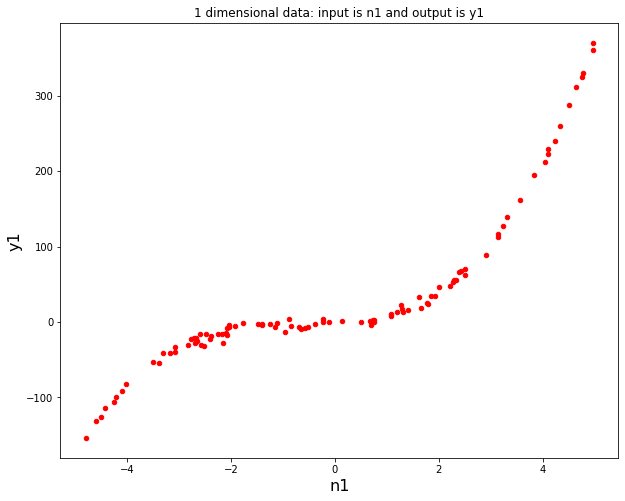

In [4]:
#VISUALIZATION OF N1 AND Y1

plt.figure(figsize=(10, 8))
plt.scatter(n1, y_1, s = 20,c = "r")
plt.xlabel('n1', fontsize=16)
plt.ylabel('y1', fontsize=16)
plt.title("1 dimensional data: input is n1 and output is y1")
plt.show()

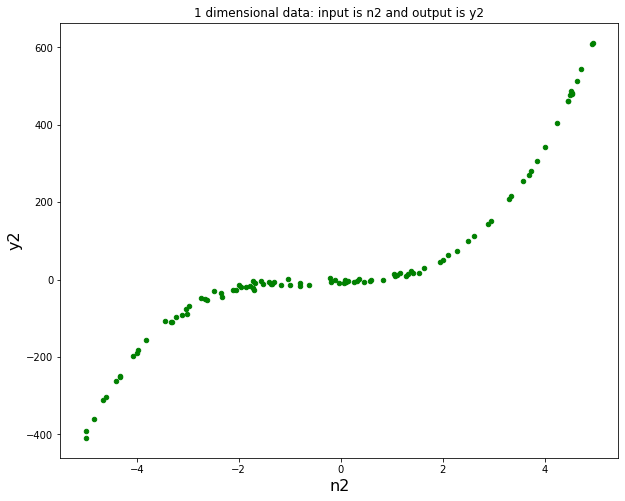

In [5]:
#VISUALIZATION OF N2 AND Y2

plt.figure(figsize=(10, 8))
plt.scatter(n2, y_2, s = 20,c = "g")
plt.xlabel('n2', fontsize=16)
plt.ylabel('y2', fontsize=16)
plt.title("1 dimensional data: input is n2 and output is y2")
plt.show()

In [6]:
#MERGE DATA(N1+N2)

X_ = np.concatenate([n1,n2])
Y_ = np.concatenate([y_1,y_2])

df_dic = {"X_": X_,"Y_":Y_}

df = pd.DataFrame(df_dic)
df

,X_,Y_
0,1.655800,18.439431
1,-0.388251,-3.002400
2,4.336780,259.355674
3,-2.032850,-3.953069
4,3.141863,117.107623
...,...,...
195,4.629941,513.173603
196,-4.002285,-190.223240
197,3.842183,306.457404
198,-1.165929,-14.543548


In [7]:
X = df.drop("Y_",axis = 1)
y = df["Y_"]

#TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.2 ,random_state = 123)

#SHAPE OF TRAIN AND TEST DATA SETS
print("Shape of train X:{}".format(X_train.shape))
print("Shape of train y:{}".format(y_train.shape))
print("Shape of test X:{}".format(X_test.shape))
print("Shape of test y:{}".format(y_test.shape))

Shape of train X:(160, 1)
Shape of train y:(160,)
Shape of test X:(40, 1)
Shape of test y:(40,)


#### MODELLING

In [8]:
#LISTS THAT WILL KEEP OUR ERROR VALUES

mean_absolute_error_test = []
mean_absolute_error_train = []

mean_squared_error_test = []
mean_squared_error_train = []

r_mean_squared_error_test = []
r_mean_squared_error_train = []

In [9]:
#FUNCTION THAT RETURNS MINIMUM TEST ERROR VALUE WITH ITS DEGREE AND TRAIN ERROR VALUE

def findMin(rmse_dict):
        
    min_rmse_value_test = rmse_dict[1][0] 
    min_rmse_value_train = rmse_dict[1][1]
    
    min_rmse = 0
    
    for i,j in rmse_dict.items():
        
        if(rmse_dict[i][0] < min_rmse_value_test):
            
            min_rmse_value_test = rmse_dict[i][0]
            min_rmse_value_train = rmse_dict[i][1]
            min_rmse = i
            
    return min_rmse,min_rmse_value_test,min_rmse_value_train

In [10]:
# MODELLING WITH DIFFERENT DEGREES 

M = 3

degrees = range (1, 5*M)

rmse_dict = {} #DICTIONARY THAT WILL KEEP ROOT MEAN SQUARED ERROR OF TEST AND TRAN SET WITH THEIR DEGREE BY USING POLYNOMIAL REGRESSION.

for i in degrees:
   
    #PREPARING DATA TO POLYNOMIAL REGRESSION WITH DEGREE i 
    poly = PolynomialFeatures(i)
    X_train_mapped = poly.fit_transform(X_train)
    X_test_mapped = poly.transform(X_test)
        
    #FITTING THE MODEL    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_mapped, y_train)
    
    #TEST AND TRAIN PREDICTIONS
    y_train_predicted = lin_reg.predict(X_train_mapped)
    y_test_predicted = lin_reg.predict(X_test_mapped)
    
    #MEAN ABSOLUTE ERROR OF TRAIN AND TEST DATA SET WITH DEGREE i
    mae_train = mean_absolute_error(y_train, y_train_predicted)
    mae_test = mean_absolute_error(y_test, y_test_predicted)
    mean_absolute_error_train.append(mae_train)
    mean_absolute_error_test.append(mae_test)
    
    #MEAN SQUARED ERROR OF TRAIN AND TEST DATA SET WITH DEGREE i
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    mean_squared_error_train.append(mse_train)
    mean_squared_error_test.append(mse_test)

    #ROOT MEAN SQUARED ERROR OF TRAIN AND TEST DATA SET WITH DEGREE i
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
    r_mean_squared_error_train.append(rmse_train)
    r_mean_squared_error_test.append(rmse_test)
    
    #ASSIGN INTO ERROR VALUES TO DICTIONARY FOR FINDING BEST DEGREE 
    rmse_dict[i] = [rmse_test, rmse_train]

#### MODEL SELECTION

In [11]:
#GETTING THE BEST PARAMETER FOR OUR MODEL AS best_m AND ITS TRAIN AND TEST ERRORS 
best_m , best_m_test_error , best_m_train_error = findMin(rmse_dict)

print("The best RMSE value by degree {}".format(best_m))
print("The test error{}".format(best_m_test_error))
print("The train error:{}".format(best_m_train_error))

The best RMSE value by degree 6
The test error48.34527675855192
The train error:41.56526195827659


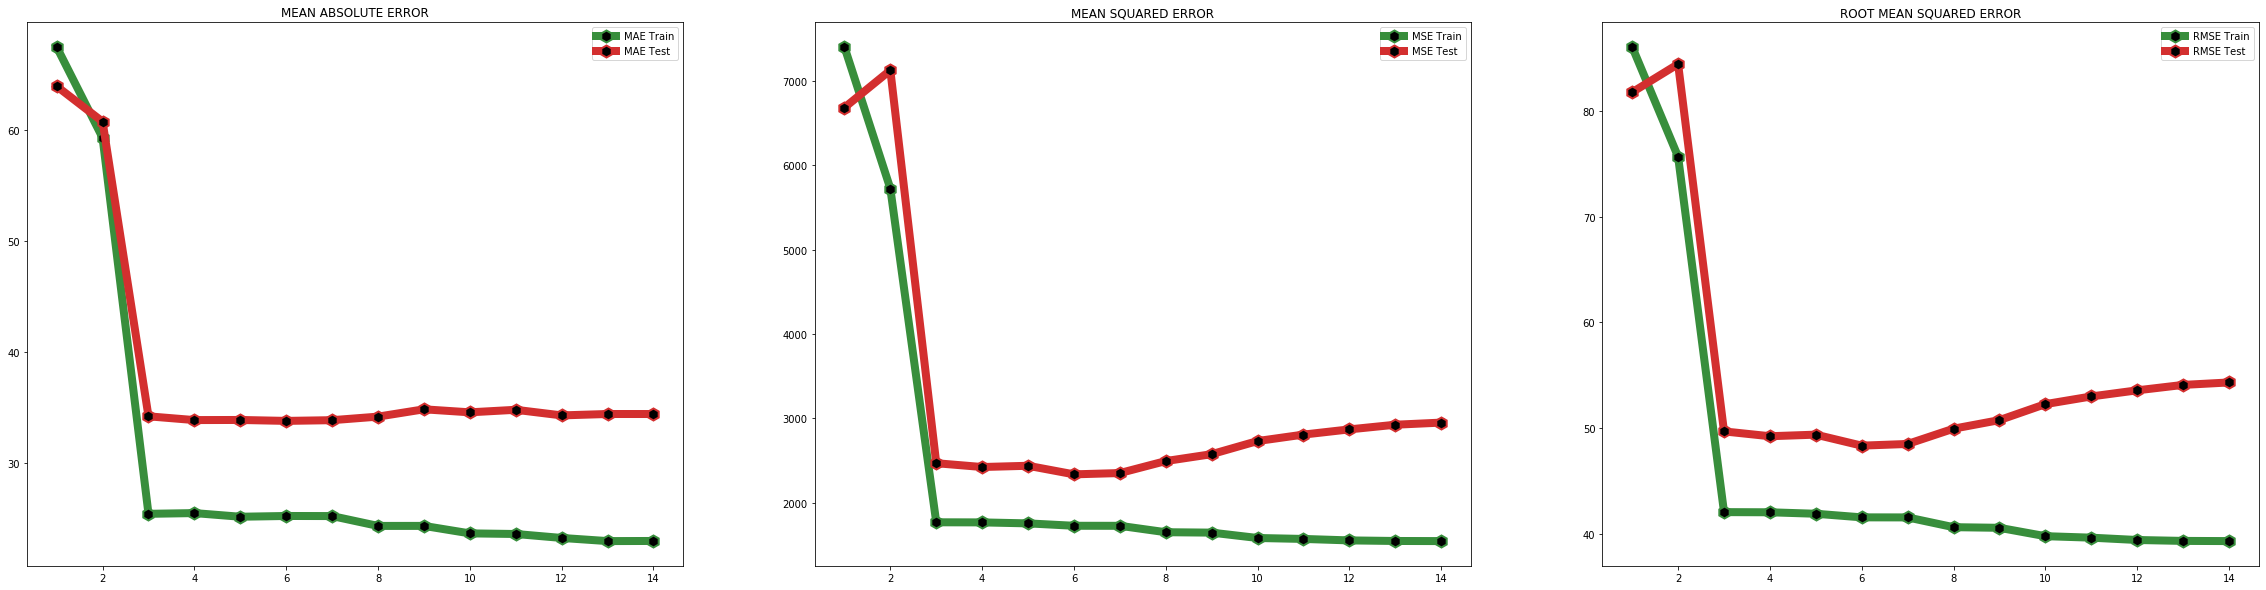

In [12]:
# VISUALIZATION OF DEGREES AND THEIR TEST,TRAIN ERRORS 

plt.figure(figsize = (40,10))

ax1 = plt.subplot(1,3,1)
ax1.plot(degrees, np.array(mean_absolute_error_train),color='#388E3C', linewidth=8,
         marker='h', markerfacecolor='black', markeredgewidth=2,
         markersize=12, label = "MAE Train");

ax1.plot(degrees, np.array(mean_absolute_error_test),color='#D32F2F', linewidth=8,
         marker='h', markerfacecolor='black', markeredgewidth=2,
         markersize=12,label = "MAE Test");
ax1.set_title("MEAN ABSOLUTE ERROR")

ax1.legend()


ax2 = plt.subplot(1,3,2)
ax2.plot(degrees, np.array(mean_squared_error_train),color='#388E3C', linewidth=8,
         marker='h', markerfacecolor='black', markeredgewidth=2,
         markersize=12,label = "MSE Train");

ax2.plot(degrees, np.array(mean_squared_error_test),color='#D32F2F', linewidth=8,
         marker='h', markerfacecolor='black', markeredgewidth=2,
         markersize=12,label = "MSE Test");

ax2.set_title("MEAN SQUARED ERROR")
ax2.legend()


ax3 = plt.subplot(1,3,3)
ax3.plot(degrees, np.array(r_mean_squared_error_train),color='#388E3C', linewidth=8,
         marker='h', markerfacecolor='black', markeredgewidth=2,
         markersize=12,label = "RMSE Train");

ax3.plot(degrees, np.array(r_mean_squared_error_test),color='#D32F2F', linewidth=8,
         marker='h', markerfacecolor='black', markeredgewidth=2,
         markersize=12,label = "RMSE Test");

ax3.set_title("ROOT MEAN SQUARED ERROR")
ax3.legend();

In [13]:
#REMODELLING WITH BEST DEGREE BY USING PIPELINE

poly_reg = Pipeline([("poly_feature",PolynomialFeatures(degree=best_m))
                    ,("linear_reg",LinearRegression())])

poly_reg.fit(X_train, y_train)

#PREDICTION WITH BEST DEGREE OF TEST DATA SET
y_hat = poly_reg.predict(X_test)

y_hat_train = poly_reg.predict(X_train)

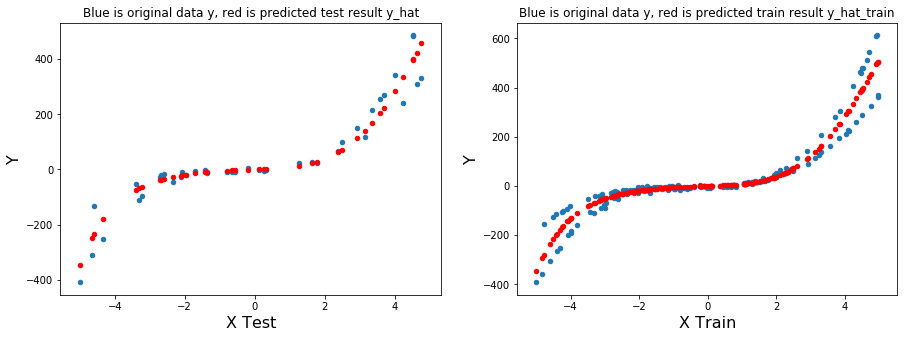

In [14]:
#VISUALIZATION OF TEST DATA SET AND TRAIN DATA SET PREDICTION AFTER MODELLING WITH BEST DEGREE

plt.figure(figsize=(15, 5))

ax1_ = plt.subplot(1,2,1)

ax1_.scatter(X_test, y_test, s = 20)
ax1_.scatter(X_test, y_hat, s = 20, color='red')
ax1_.set_title('Blue is original data y, red is predicted test result y_hat')
ax1_.set_xlabel('X Test', fontsize=16)
ax1_.set_ylabel('Y', fontsize=16)


ax2_ = plt.subplot(1,2,2)

ax2_.scatter(X_train, y_train, s = 20)
ax2_.scatter(X_train, y_hat_train, s = 20, color='red')
ax2_.set_title('Blue is original data y, red is predicted train result y_hat_train')
ax2_.set_xlabel('X Train', fontsize=16)
ax2_.set_ylabel('Y', fontsize=16);

#### LEARNING CURVE

In [15]:
def plot_learning_curves(model, X, y):   
    train_errors, test_errors = [], []
    for m in range(M + 10, len(X_train)):
        
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(np.sqrt(mean_squared_error(y_train[:m], y_train_predict)))
        test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=5, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=5, label="test")
    plt.legend()

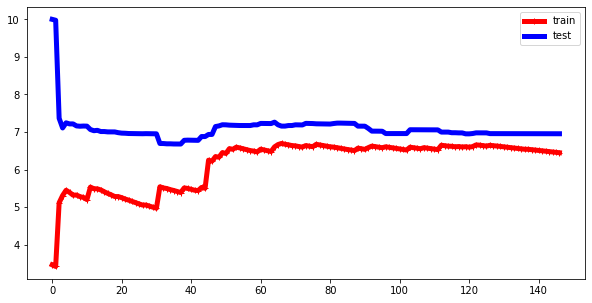

In [16]:
plt.figure(figsize=(10, 5))

polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=best_m)),
("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)